Importing Libraries & Data

In [64]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
import joblib

import ipywidgets as widgets
from IPython.display import display


In [2]:
df=pd.read_csv('car data.xls')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Understanding data

In [4]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
41,alto k10,2014,2.55,3.98,46706,Petrol,Dealer,Manual,0
81,etios gd,2015,4.75,7.85,40000,Diesel,Dealer,Manual,0
185,Suzuki Access 125,2008,0.25,0.58,1900,Petrol,Individual,Automatic,0
202,grand i10,2015,4.40,5.70,28200,Petrol,Dealer,Manual,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0


In [6]:
print("No of rows in this data: ",df.shape[0])
print("No of columns in this data: ",df.shape[1])

No of rows in this data:  301
No of columns in this data:  9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Data Preprocessing

In [12]:
dt=datetime.datetime.now()

In [13]:
df['Old'] = dt.year-df['Year']

In [14]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8


In [16]:
df.drop("Year",axis=1,inplace=True)

Outlier Removal

<Axes: ylabel='Selling_Price'>

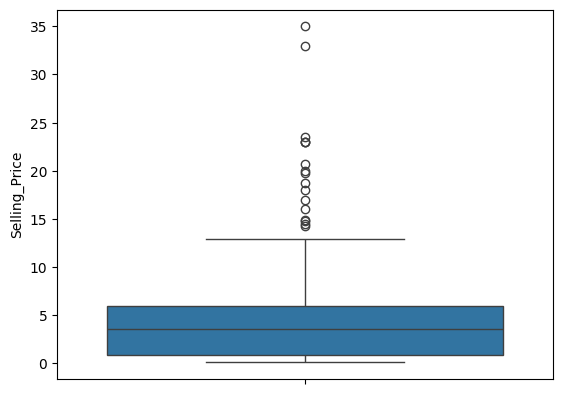

In [17]:
sns.boxplot(df['Selling_Price'])

In [18]:
sorted(df['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [19]:
df=df[~(df['Selling_Price']>30)]

In [20]:
df.shape

(299, 9)

Encoding categorical columns

In [23]:
df.head(1)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,ritz,3.35,5.59,27000,0,Dealer,Manual,0,11


In [21]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [22]:
df['Fuel_Type']=df['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [24]:
df['Fuel_Type'].unique()

array([0, 1, 2])

In [25]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [26]:
df['Seller_Type']=df['Seller_Type'].map({'Dealer':0,'Individual':1})

In [27]:
df['Seller_Type'].unique()

array([0, 1])

In [28]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [29]:
df['Transmission']=df['Transmission'].map({'Manual':0,'Automatic':1})

In [30]:
df['Transmission'].unique()

array([0, 1])

In [31]:
df.head(3)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8


Training

In [32]:
X=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [33]:
X

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Old
0,5.59,27000,0,0,0,0,11
1,9.54,43000,1,0,0,0,12
2,9.85,6900,0,0,0,0,8
3,4.15,5200,0,0,0,0,14
4,6.87,42450,1,0,0,0,11
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,0,0,9
297,5.90,60000,0,0,0,0,10
298,11.00,87934,0,0,0,0,16
299,12.50,9000,1,0,0,0,8


In [34]:
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
xg = GradientBoostingRegressor()
xg.fit(X_train,y_train)

GradientBoostingRegressor()

In [44]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_xg = xg.predict(X_test)

Evaluating

In [48]:
result1 = r2_score(y_test, y_pred_lr)
result2 = r2_score(y_test, y_pred_rf)
result3 = r2_score(y_test, y_pred_xgb)
result4 = r2_score(y_test, y_pred_xg)

In [49]:
print(result1,result2,result3,result4)

0.6790884983129406 0.7507258282791978 0.8887471822279068 0.8807329241344927


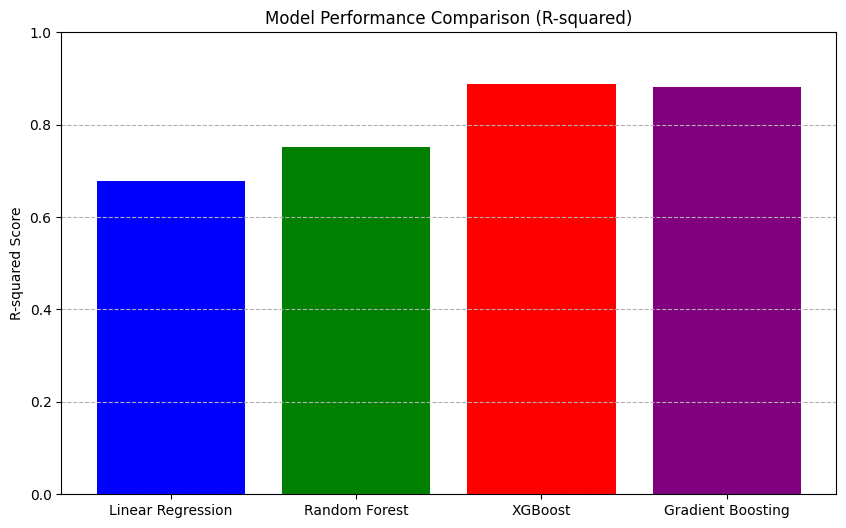

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(['Linear Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting'], [result1, result2, result3, result4], color=['blue', 'green', 'red', 'purple'])
plt.ylabel('R-squared Score')
plt.title('Model Performance Comparison (R-squared)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()

In [52]:
xg = XGBRegressor()
final = xg.fit(X,y)

In [54]:
joblib.dump(final,'car_price_prediction')

['car_price_prediction']

In [55]:
car_price_prediction = joblib.load('car_price_prediction')

Predicting new data

In [61]:
new_data = pd.DataFrame({
    'Present_Price': 7.15,
    'Kms_Driven': 50000,
    'Fuel_Type': 1,
    'Seller_Type': 0,
    'Transmission': 0,
    'Owner': 1,
    'Old': 2
},index=[0])

In [62]:
car_price_prediction.predict(new_data)

array([4.561648], dtype=float32)

In [63]:
# Create widgets for each input feature
present_price_widget = widgets.FloatSlider(min=0, max=35, step=0.1, description='Present Price:')
kms_driven_widget = widgets.IntSlider(min=0, max=100000, step=1000, description='Kms Driven:')
fuel_type_widget = widgets.Dropdown(options=[('Petrol', 0), ('Diesel', 1), ('CNG', 2)], description='Fuel Type:')
seller_type_widget = widgets.Dropdown(options=[('Dealer', 0), ('Individual', 1)], description='Seller Type:')
transmission_widget = widgets.Dropdown(options=[('Manual', 0), ('Automatic', 1)], description='Transmission:')
owner_widget = widgets.IntSlider(min=0, max=3, step=1, description='Owner:')
old_widget = widgets.IntSlider(min=0, max=20, step=1, description='Old:')

# Create an output widget
output_widget = widgets.Output()

# Function to predict the car price
def predict_price(present_price, kms_driven, fuel_type, seller_type, transmission, owner, old):
    new_data = pd.DataFrame({
        'Present_Price': [present_price],
        'Kms_Driven': [kms_driven],
        'Fuel_Type': [fuel_type],
        'Seller_Type': [seller_type],
        'Transmission': [transmission],
        'Owner': [owner],
        'Old': [old]
    })
    predicted_price = car_price_prediction.predict(new_data)[0]
    with output_widget:
        output_widget.clear_output()
        print(f"Predicted Selling Price: {predicted_price:.2f}")

# Link widgets to the prediction function
widgets.interactive_output(
    predict_price,
    {
        'present_price': present_price_widget,
        'kms_driven': kms_driven_widget,
        'fuel_type': fuel_type_widget,
        'seller_type': seller_type_widget,
        'transmission': transmission_widget,
        'owner': owner_widget,
        'old': old_widget
    }
)

# Display the widgets and the output area
display(
    present_price_widget,
    kms_driven_widget,
    fuel_type_widget,
    seller_type_widget,
    transmission_widget,
    owner_widget,
    old_widget,
    output_widget
)


FloatSlider(value=0.0, description='Present Price:', max=35.0)

IntSlider(value=0, description='Kms Driven:', max=100000, step=1000)

Dropdown(description='Fuel Type:', options=(('Petrol', 0), ('Diesel', 1), ('CNG', 2)), value=0)

Dropdown(description='Seller Type:', options=(('Dealer', 0), ('Individual', 1)), value=0)

Dropdown(description='Transmission:', options=(('Manual', 0), ('Automatic', 1)), value=0)

IntSlider(value=0, description='Owner:', max=3)

IntSlider(value=0, description='Old:', max=20)

Output()